In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [10]:
mnist_df = pd.read_csv('mnist_train.csv')
mnist_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that there are 785 features in total, and it is important to reduce it to lesser number of features to escape the curse of dimensionality.

Let us save the labels into a variable and store only the pixel data in another variable

In [12]:
mnist_df['label']

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [21]:
labels = mnist_df['label']

In [22]:
data = mnist_df.drop('label', axis = 1)

Now, we perform the data-preprocessing

In [42]:
from sklearn.preprocessing import StandardScaler

standardised_data = StandardScaler().fit_transform(mnist_df)

In [43]:
print(standardised_data.shape)

(60000, 785)


We have 60,000 rows in total, and it would take a lot of time to pick all of these points and then perform t-SNE. So we will pick only the top 1000 points as t-SNE.

In [44]:
data_1000 = standardised_data[0:1000,:]

We will also only pick the first 1000 labels

In [45]:
labels_1000 = labels[0:1000]

Now we will perform the t-SNE

In [55]:
model = TSNE(n_components = 2, random_state = 0)


Here we have taken the number of components to be 2, the default perplexity to be 30, the default learning rate to be 200, the max number of iterations for the optimisation to be 1000

In [56]:
tsne_data = model.fit_transform(data_1000)

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Varun\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [58]:
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim_1", "Dim_2","label"))

C:\Users\Varun\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


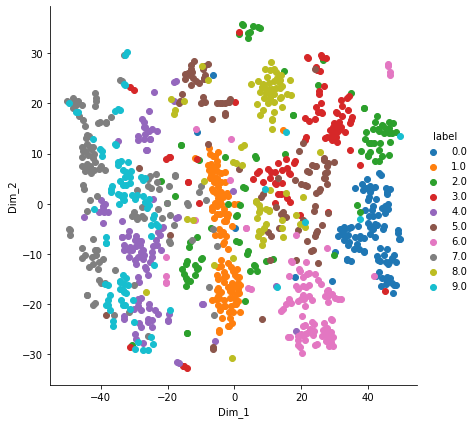

In [59]:
sns.FacetGrid(tsne_df, hue = 'label', size = 6).map(plt.scatter,'Dim_1','Dim_2').add_legend()